In [23]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import mpl_toolkits.mplot3d

cleanInsurance = pd.read_csv("sets/insurance_clean.csv")
featureNames = list(cleanInsurance.columns)
featureNames.pop()
totalFeatures = cleanInsurance.loc[:, featureNames]
sb.set()

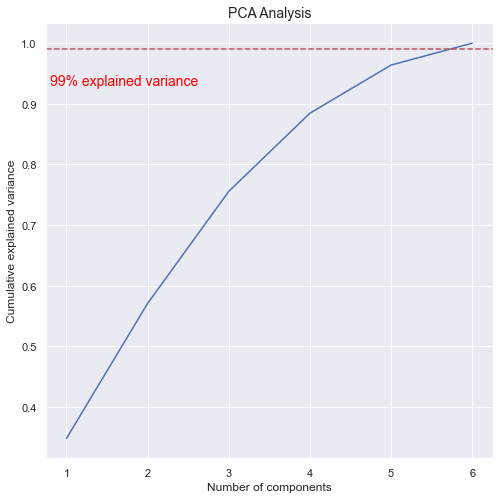

In [24]:
#plot of cumulative explained variance vs. # of PCs
scaler = MinMaxScaler()
scaledFeatures = scaler.fit_transform(totalFeatures)

pca = PCA()
pca.fit(scaledFeatures)
cumulativeVar = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize = (8, 8))
plt.plot(range(1, pca.n_components_ + 1), [cumulativeVar[i] for i in range(len(cumulativeVar))])
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.title('PCA Analysis', fontsize=14)

plt.axhline(y = 0.99, color='r', linestyle='--')
plt.text(0.8, .93, '99% explained variance', color = 'red', fontsize=14)

plt.show()

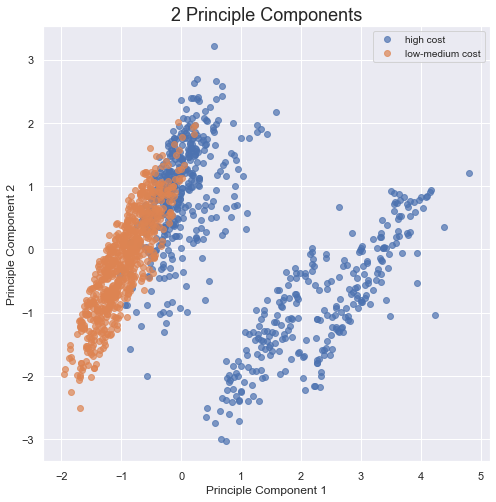

In [25]:
#assign labels "high cost" and "low-median cost" based on median of charges
charges_median = cleanInsurance['charges'].median()
labels = []

for index, row in cleanInsurance.iterrows():
    if row['charges'] > charges_median:
        labels.append("high cost")
    else:
        labels.append("low-medium cost")
        
#plot of datapoints in 2D space using first 2 PCs
standard_scaler = StandardScaler()
data_rescaled = standard_scaler.fit_transform(cleanInsurance)
pca2 = PCA(n_components=2)
components = pca2.fit_transform(data_rescaled)

principalDf=pd.DataFrame(data=components,columns=['PC1','PC2']) 
principalDf['label'] = labels

plt.figure(figsize = (8, 8))
for key, group in principalDf.groupby(['label']):
    plt.plot(group.PC1, group.PC2, 'o', alpha=0.7, label=key)
plt.legend(fontsize=10)
plt.margins(0.05)
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')
plt.title('2 Principle Components',fontsize=18) 
plt.show()

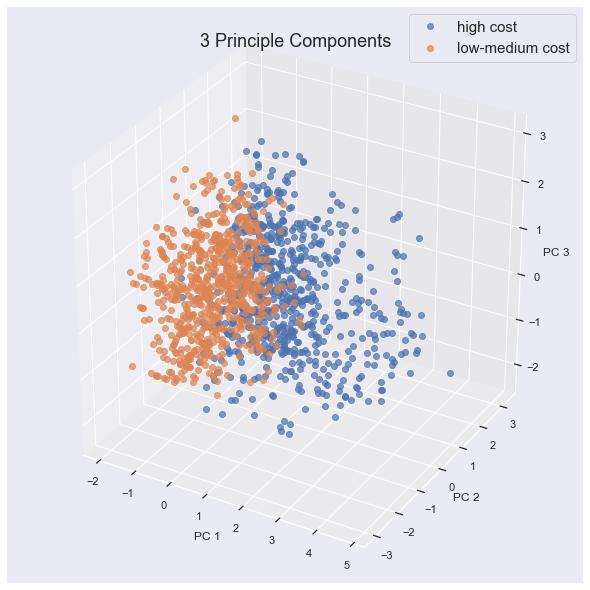

In [26]:
#plot of datapoints in 3D space using first 3 PCs
pca3 = PCA(n_components=3)
components = pca3.fit_transform(data_rescaled)

principalDf=pd.DataFrame(data=components,columns=['PC1','PC2','PC3']) 
principalDf['label'] = labels

fig = plt.figure(1, figsize=(8, 8))
ax = mpl_toolkits.mplot3d.Axes3D(fig)
for key, group in principalDf.groupby(['label']):
    ax.plot(group.PC1, group.PC2, group.PC3, 'o', alpha=0.7, label=key)

ax.set_title("3 Principle Components",fontsize=18)
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
ax.legend(fontsize=15)
plt.show()

In [ ]:
# Trying principal component analysis only on training set

trainInsurance = pd.read_csv("sets/insurance_train.csv")
testInsurance = pd.read_csv("sets/insurance_test.csv")

featureNames = list(trainInsurance.columns)
featureNames.pop()
trainX = trainInsurance.loc[:, featureNames]
testX = testInsurance.loc[:, featureNames]

standardScaler = StandardScaler()

standardScaler.fit(trainX)
trainX = standardScaler.transform(trainX)
testX = standardScaler.transform(testX)

pca = PCA(0.99)

pca.fit(trainX)
trainX = pca.transform(trainX)
testX = pca.transform(testX)